# 회귀분석용 가상 데이터 생성 방법

Scikit-learn의 datasets 서브 패키지는 회귀분석용 가상 데이터를 생성하는 명령어인 `make_regression()`를 제공한다. `make_regression()` 명령으로 만들어진 데이터는 종속 변수 $y$의 값이 독립 변수 $x$ 벡터의 선형 조합인 선형관계를 가진다. ($b$는  y절편 즉, 바이어스(bias) 값이다) 

여기에 정규분포 $\epsilon$만큼의 **오차(disturbance)**가 추가되는데 이 오차는 종속 변수 $y$에 영향을 미치는 요인 중에서 우리가 고려하지 않는 것들의 영향을 모두 합친 것이라고 생각하면 된다. 중심 극한 정리에 따라 이러한 모든 영향의 합은 정규 분포를 따를 가능성이 높기 때문에 오차 $\epsilon$는 보통 **기댓값이 0인 정규 분포 확률 변수로 가정**한다.

$$ y = b + w^Tx + \epsilon $$ 

위 식에서 $x$, $w$는 $M$차원 벡터($M$은 입력 차원)  $y$, $b$, $\epsilon$는 모두 스칼라 값이다.

복수의 데이터에 대해서는 다음처럼 쓸 수 있다.

$$ y = b\mathbf{1} + Xw + \epsilon $$ 

이 경우에는 $y$는 $N$차원 벡터($N$은 데이터의 갯수), $X$는 $N\times M$차원 행렬($M$은 입력 차원), $w$는 $M$차원 벡터, $\epsilon$는 $N$차원 벡터, $\mathbf{1}$는 $N$차원 1-벡터이다.

`make_regression()` 명령은 내부적으로 입력(독립 변수) 데이터인 $X$ 행렬, 오차 $\epsilon$ 벡터, 계수 $w$ 벡터를 확률적으로 생성한 후, 위 관계식에 따라 출력(종속 변수) 데이터 $y$ 벡터를 계산하여 $X$, $y$ 값을 출력한다. 자세한 사용법은 다음과 같다.

```
X, y = make_regression(...)
```
또는
```
X, y, w = make_regression(..., coef=True, ...)
```

입력 인수는 다음과 같다.

 * `n_samples` : 정수 (옵션, 디폴트 100)
    * 표본 데이터의 갯수 $N$
 * `n_features` : 정수 (옵션, 디폴트 100)
    * 독립 변수(feature)의 수(차원) $M$
 * `n_targets` : 정수 (옵션, 디폴트 1)
    * 종속 변수(target)의 수(차원)
 * `bias` : 실수 (옵션, 디폴트 0.0)
    * y 절편
 * `noise` : 실수 (옵션, 디폴트 0.0)
    * 출력 즉, 종속 변수에 더해지는 오차 $\epsilon$의 표준 편차
 * `coef` : 불리언 (옵션, 디폴트 False)
   * True 이면 선형 모형의 계수도 출력
 * `random_state` : 정수 (옵션, 디폴트 None)
   * 난수 발생용 시드값 

출력은 다음과 같다.

 * `X` : [`n_samples`, `n_features`] 형상의 2차원 배열
    * 독립 변수의 표본 데이터 행렬 $X$
 * `y` : [`n_samples`] 형상의 1차원 배열 또는 [`n_samples`, `n_targets`] 형상의 2차원 배열
    * 종속 변수의 표본 데이터 벡터 $y$
 * `coef` : [`n_features`] 형상의 1차원 배열 또는 [`n_features`, `n_targets`] 형상의 2차원 배열 (옵션)
    * 선형 모형의 계수 벡터 $w$, 입력 인수 `coef`가 True 인 경우에만 출력됨

다음은 독립 변수가 1개, 종속 변수가 1개이며 `noise` 인수값이 0이므로 오차가 없는 경우이다.

In [1]:
from sklearn.datasets import make_regression

X, y, w = make_regression(n_samples=10, n_features=1, bias=0, noise=0,
                          coef=True, random_state=0)

In [2]:
X

array([[ 0.97873798],
       [ 2.2408932 ],
       [ 1.86755799],
       [ 0.95008842],
       [ 1.76405235],
       [ 0.4105985 ],
       [-0.97727788],
       [ 0.40015721],
       [-0.10321885],
       [-0.15135721]])

In [3]:
y

array([  77.48913677,  177.41712535,  147.85924209,   75.22087885,
        139.66444108,   32.50811146,  -77.37353667,   31.6814481 ,
         -8.17209494,  -11.98332915])

In [4]:
w

array(79.17250380826646)

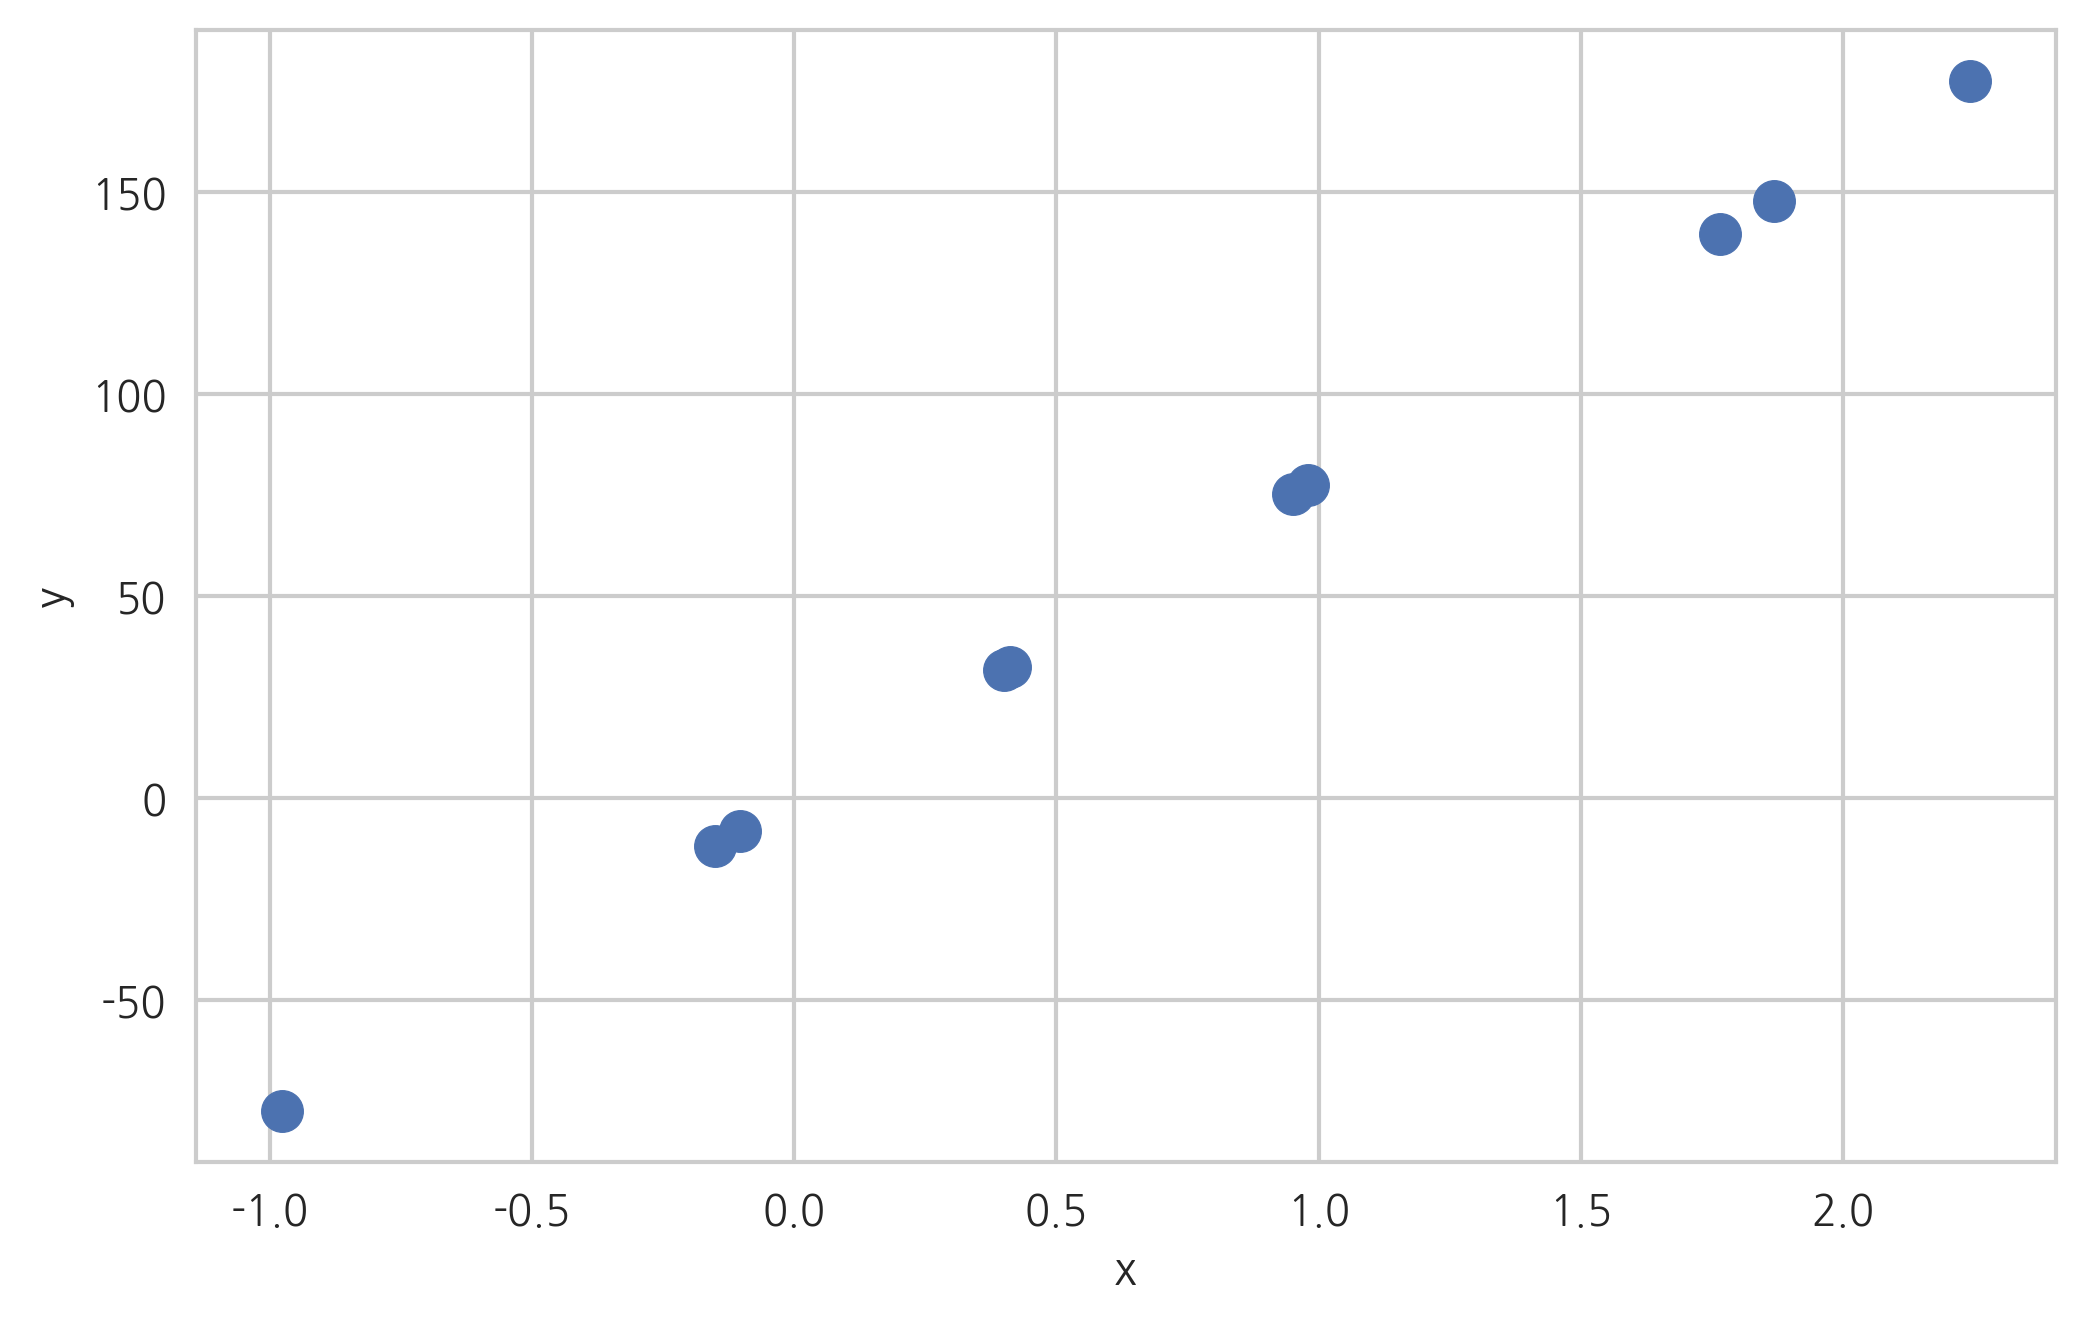

In [5]:
plt.scatter(X, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

위 코드를 실행하여 나온 선형 모형은 다음과 같다.

$$
y = 79.1725 x 
$$

`noise` 인수를 증가시키면  $\text{Var}[\epsilon]$가 증가하고 `bias` 인수를 증가시키면 y 절편 $b$가 증가한다.

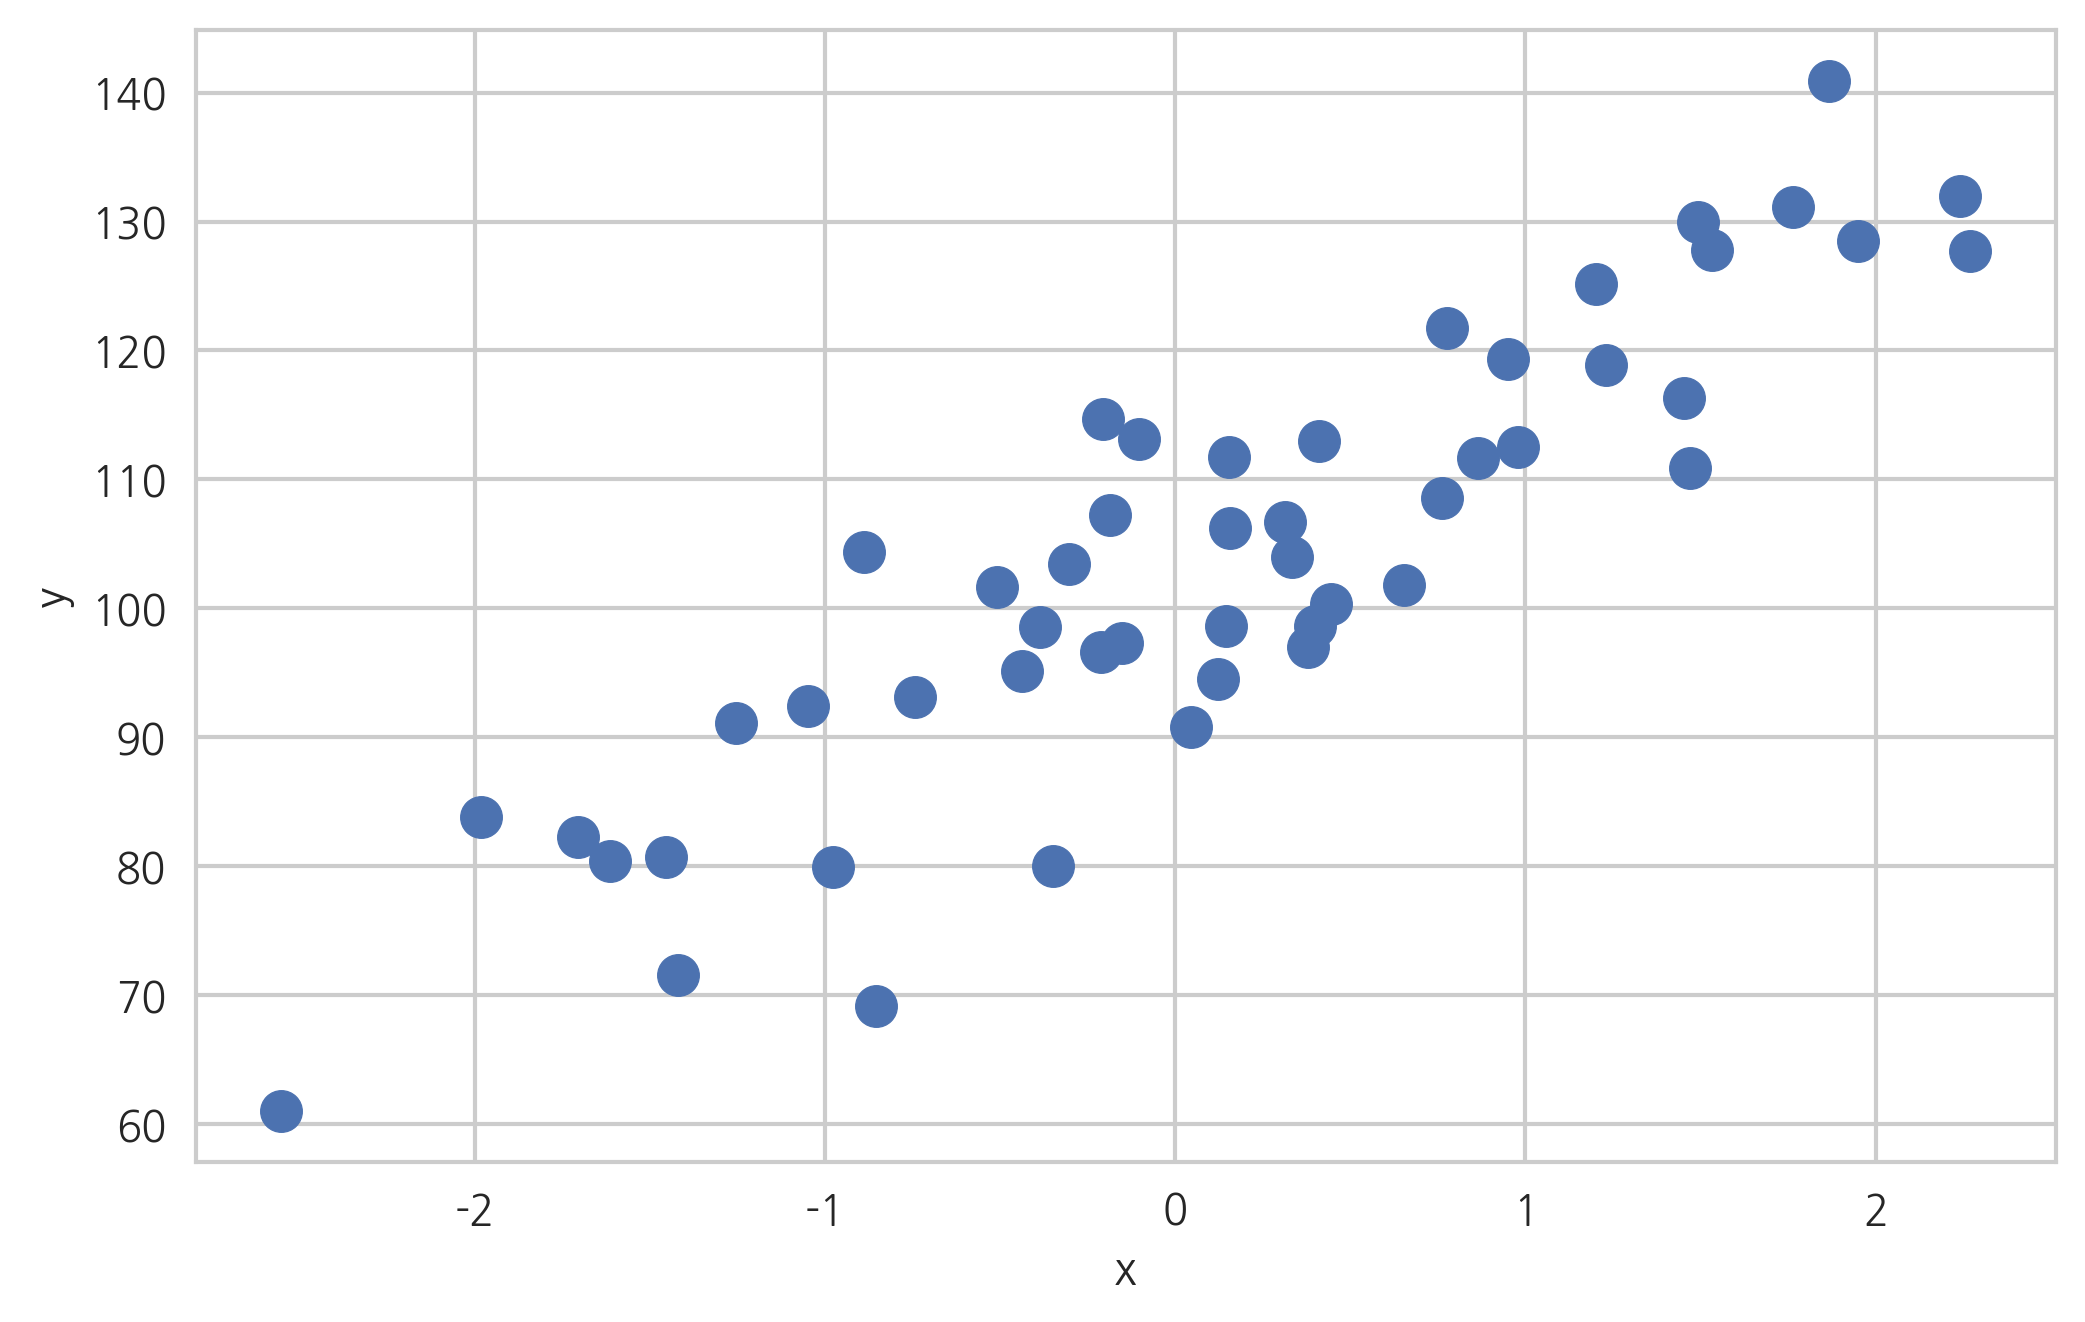

In [6]:
X, y, w = make_regression(n_samples=50, n_features=1, bias=100, noise=10,
                          coef=True, random_state=0)
plt.scatter(X, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#### 연습 문제 1

1.  `make_regression`과 같은 기능을 하는 함수 `make_regression2`를 만들어라. 단 `make_regression2`는 `coef=True` 라고 가정한다. 즉 항상 가중치 계수를 반환한다. 또한 1차원 독립 변수만 생성할 수 있으므로 다음과 같은 인수만 가진다.

    * `n_samples`
    * `bias`
    * `noise`
    * `random_state`

2. `make_regression2` 함수에 `coef` 인수를 추가하여  `make_regression3` 함수를 만들어라. `make_regression3` 함수는 가중치를 스스로 생성하지 않고 `coef` 인수로 받은 가중치 계수 값을 그대로 사용하며  가중치 계수를 반환하지 않는다.


이번에는 `n_features` 즉, 독립 변수가 2개인 표본 데이터를 생성하여 스캐터 플롯을 그리면 다음과 같다. 종속 변수 값은 점의 명암으로 표시하였다.

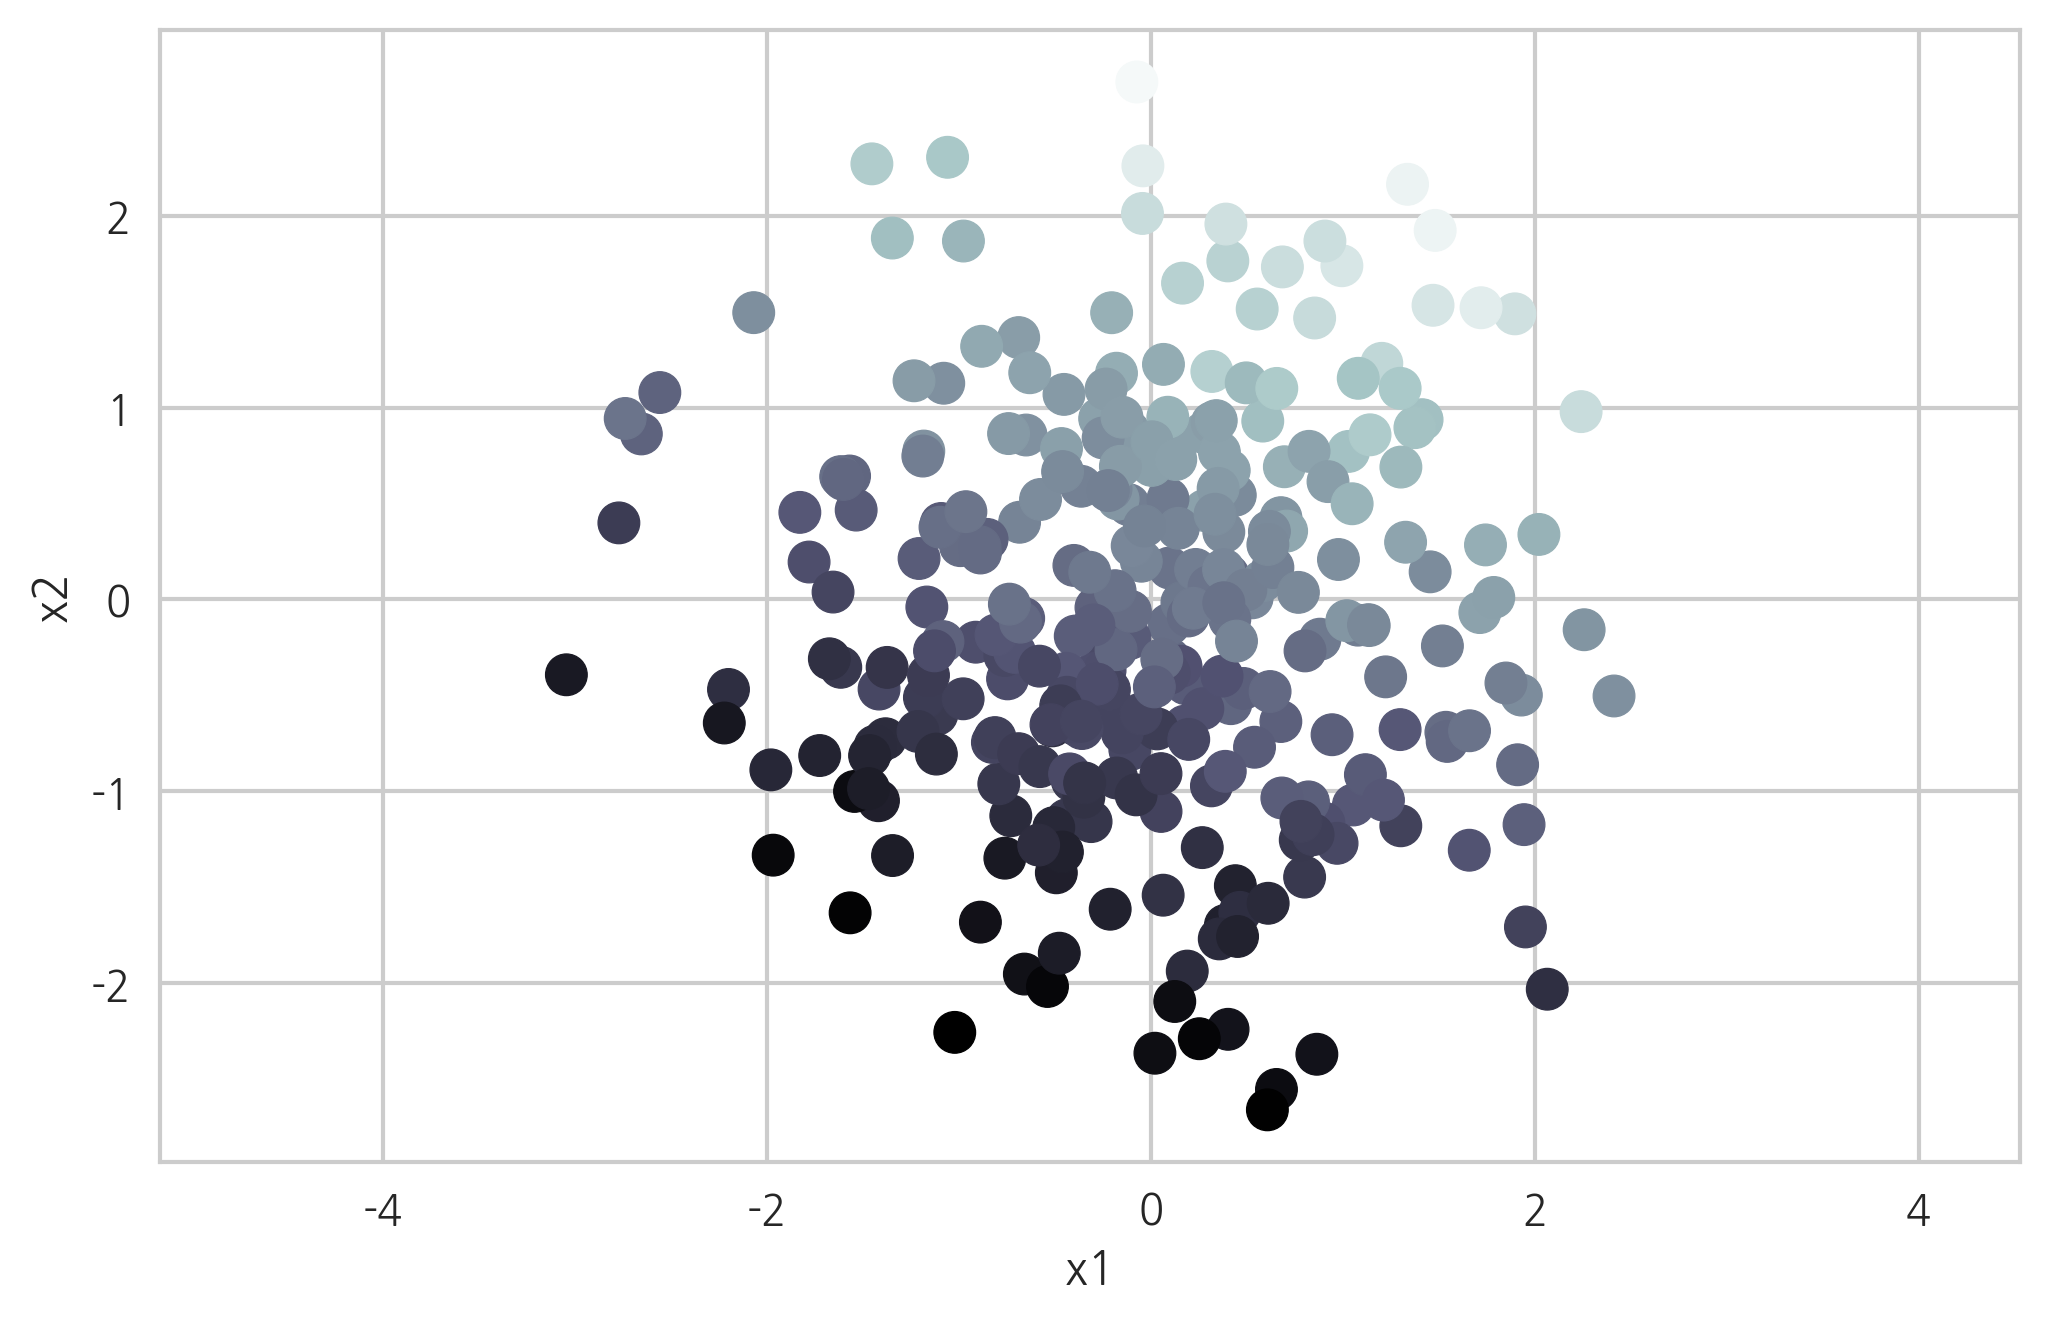

In [7]:
X, y, w = make_regression(n_samples=300, n_features=2, noise=10, 
                          coef=True, random_state=0)

plt.scatter(X[:,0], X[:,1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.show()

`make_regression` 명령은 위에서 설명한 인수 이외에도 다음과 같은 인수를 가질 수 있다.

* `n_informative` : 정수 (옵션, 디폴트 10)
    * 독립 변수(feature) 중 실제로 종속 변수와 상관 관계가 있는 독립 변수의 수(차원)
* `effective_rank`: 정수 또는 None (옵션, 디폴트 None)
    * 독립 변수(feature) 중 서로 독립인 독립 변수의 수. 만약 None이면 모두 독립
* `tail_strength` : 0부터 1사이의 실수 (옵션, 디폴트 0.5)
    * `effective_rank`가 None이 아닌 경우 독립 변수간의 상관관계를 결정하는 변수. 0.5면 독립 변수간의 상관관계가 없다.

예를 들어 2차원의 x 데이터 중 실제로 y값에 영향을 미치는 독립 변수는 하나 뿐이라면 다음처럼 `n_informative=1`로 설정한다.

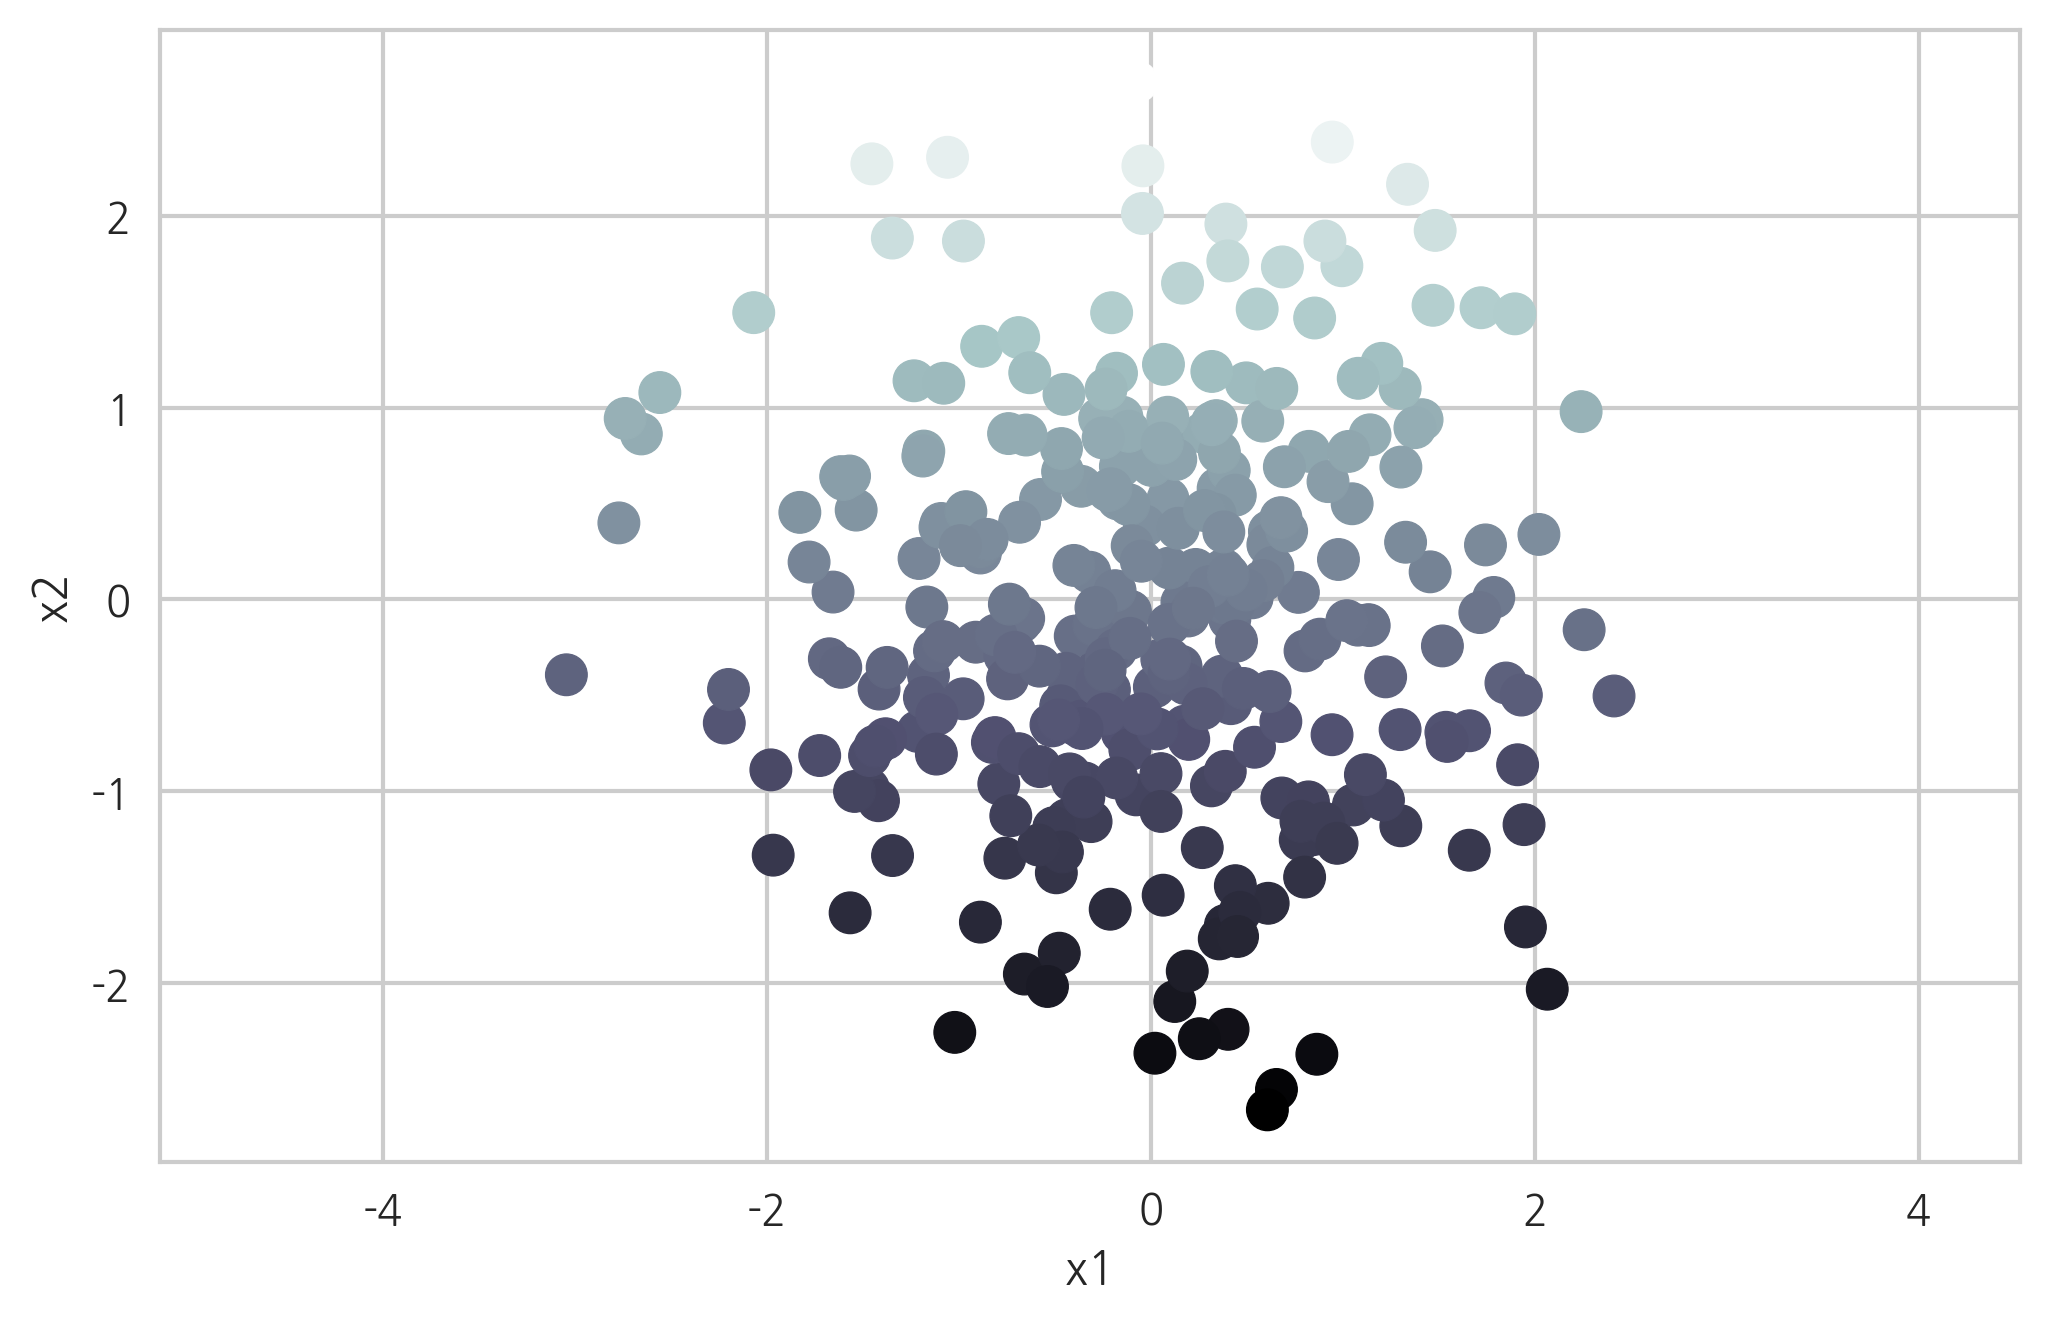

In [8]:
X, y, w = make_regression(n_samples=300, n_features=2, n_informative=1, 
                          noise=0, coef=True, random_state=0)

plt.scatter(X[:,0], X[:,1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.show()

만약 두 독립 변수간의 상관관계를 증가시키고 싶다면 다음처럼 `tail_strength`를 0에 가까운 작은 값으로 설정한다.

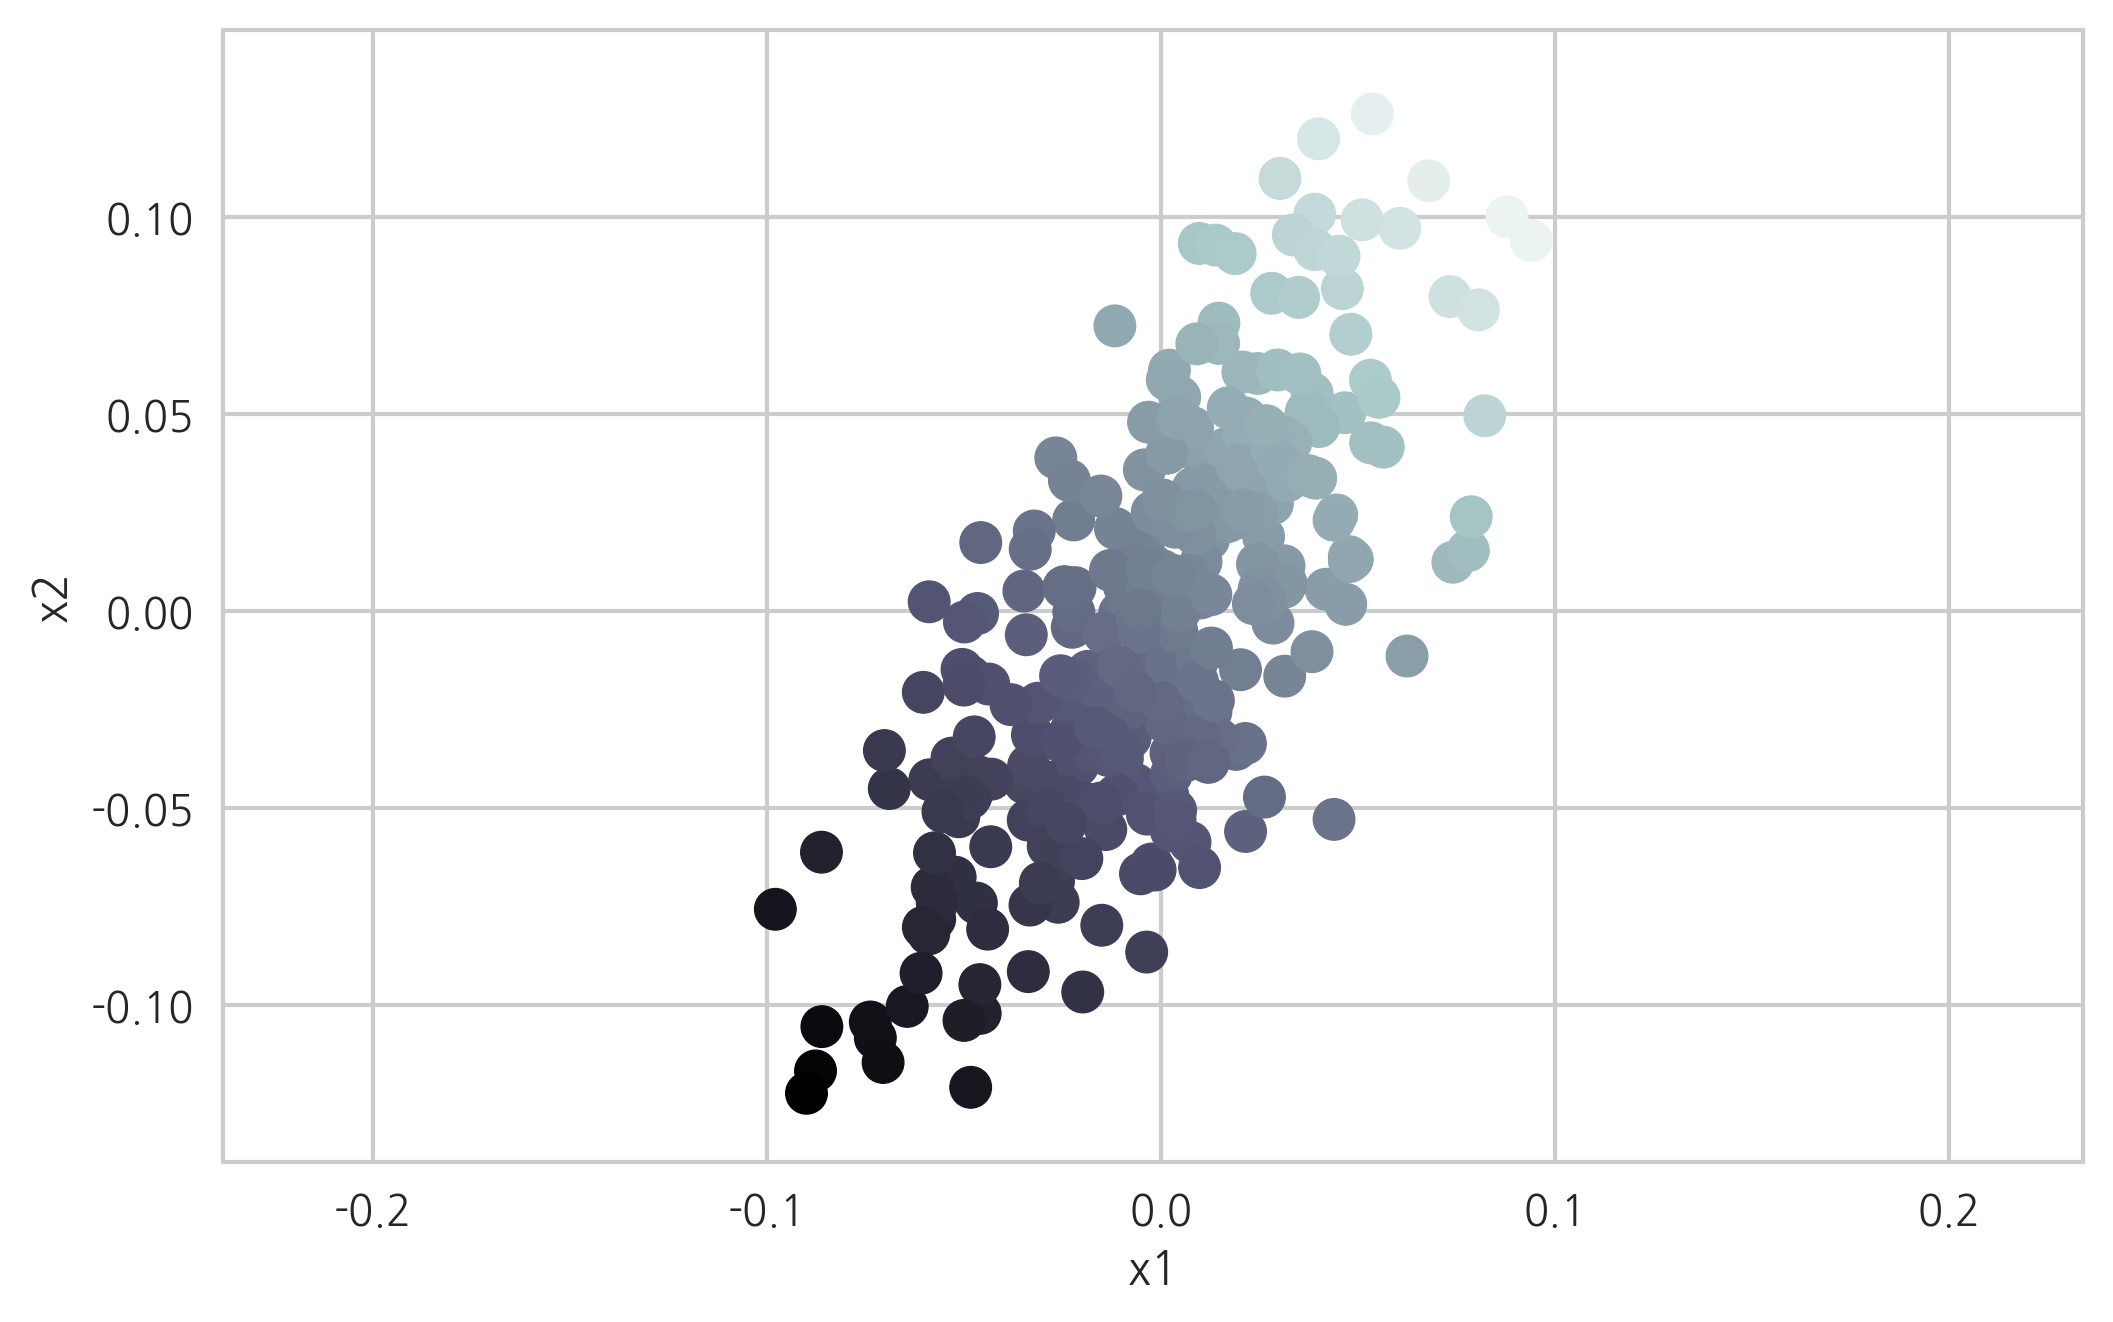

In [17]:
X, y, w = make_regression(n_samples=300, n_features=2, effective_rank=1, noise=0, 
                          tail_strength=0, coef=True, random_state=0)

plt.scatter(X[:,0], X[:,1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.show()